In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

Recall the power method for computing the eigenvector of matrix $A$ corresponding to the largest (absolute value) eigenvalue of $A$.  Please write a program which does the following:

## 1. Create a set of $N$ unit radius vectors (i.e. vectors which start on the origin and end of the unit circle) equispaced around the unit circle.  Then plot the vectors.

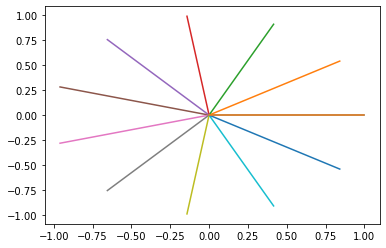

In [2]:
def get_N(N):
    theta = np.linspace(0, 2 * np.pi, N)
    vecs = np.array([[np.cos(t), np.sin(t)] for t in theta])
    return vecs

def plot_vecs(vecs):
    for vec in vecs:
        plt.plot([0, vec[0]], [0, vec[1]])

N = 12
vecs = get_N(N)
plot_vecs(vecs)


## 2. Accept a 2x2 symmetric matrix $A$ and multiply the vectors by $A$ in a loop. Normalize the vectors after each multiplication, then plot them again. You should see all the vectors collapse into one pair of vectors pointing in opposite directions.



Text(0.5, 1.0, 'Unit vectors after iteration')

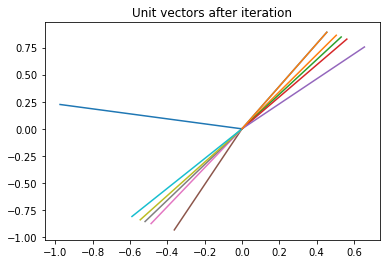

In [3]:
def iterate(A, vecs):
    # Accept a 2x2
    assert A.shape == (2, 2)
    # symmetric matrix
    assert A[0][1] == A[1][0]
    vecs = get_N(N)
    temp = []
    for vec in vecs:
        dot = np.dot(A, vec)
        norm = np.linalg.norm(dot)
        temp.append(dot / norm)
    vecs = np.array(temp)
    return vecs

# Generate symmetric matrix by taking upper triangular of regular matrix and reflecting
U = np.random.uniform(low=1, high=10, size=(2, 2))
mat = np.tril(U) + np.tril(U, -1).T

iterated_vecs = iterate(mat, vecs)
plot_vecs(iterated_vecs)
plt.title("Unit vectors after iteration")

## 3. After the iteration has converged, please take one of the vectors and use it to compute and print out the associated eigenvalue using the Rayleigh quotient. Also print out the eigenvector itself.

In [4]:
# Random Guess
v = np.array([1, 1])
mu = vecs[0] #1 + 1j

for k in range(1,10):
    B = mat - mu*np.eye(2)
    w = np.linalg.solve(B,v)
    v = w / np.linalg.norm(w,2)
    mu = np.dot(np.conj(v.T), np.dot(mat,v))

eig = mu.real
print(eig)

-0.7035052352687623


## 4. To test your program please use Matlab’s eig() function and compare both your eigenvalue and your eigenvector against Matlab’s.

In [5]:
print(mu, v)
np.linalg.eig(mat)

# Aligns with first eigenvalue and eigenvector

-0.7035052352687623 [-0.85047061  0.52602257]


(array([-0.70350524, 13.82308699]),
 array([[-0.85047061, -0.52602257],
        [ 0.52602257, -0.85047061]]))